In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
import json
import re     
import datetime as dt
import os
import glob
from pandas import DataFrame
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Mecab
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False
from tqdm import tqdm_notebook




In [19]:
f= pd.read_csv('불용어사전(한글자).csv',encoding='euc-kr')
stop_list = list(f)
Unnamed = 'Unnamed: '+ str(len(stop_list)-1)
stop_list.extend(['거','저','내','더','용','앞','윤','분','늘','멀','욬','수','번','안','이','제','요','안','뭐','더','전'])
stop_words = set(stop_list)

stop_words.remove(Unnamed)

# stop_words

# 단어 새로 추가했을 때에 사용!!!
f = open('불용어사전(한글자).csv','w')
for i in stop_words:
    f.write(i+',')
f.close()


In [ ]:
pd.read_csv('/')

유투브 채널 이름 입력하시오.아름송이
['아름송이/comment\\아름송이_comment_1.csv', '아름송이/comment\\아름송이_comment_10.csv', '아름송이/comment\\아름송이_comment_11.csv', '아름송이/comment\\아름송이_comment_12.csv', '아름송이/comment\\아름송이_comment_13.csv', '아름송이/comment\\아름송이_comment_14.csv', '아름송이/comment\\아름송이_comment_15.csv', '아름송이/comment\\아름송이_comment_16.csv', '아름송이/comment\\아름송이_comment_17.csv', '아름송이/comment\\아름송이_comment_18.csv', '아름송이/comment\\아름송이_comment_19.csv', '아름송이/comment\\아름송이_comment_2.csv', '아름송이/comment\\아름송이_comment_20.csv', '아름송이/comment\\아름송이_comment_3.csv', '아름송이/comment\\아름송이_comment_4.csv', '아름송이/comment\\아름송이_comment_5.csv', '아름송이/comment\\아름송이_comment_6.csv', '아름송이/comment\\아름송이_comment_7.csv', '아름송이/comment\\아름송이_comment_8.csv', '아름송이/comment\\아름송이_comment_9.csv']


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:95: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'언니': 651, '진짜': 399, '영상': 242, '송이': 233, '메이크업': 138, '아름': 112, '오늘': 101, '같아요': 84, '이뻐요': 79, '사랑': 74, '화장': 72, '예뻐요': 72, '보고': 64, '정보': 63, '항상': 63, '흑발': 62, '커플': 59, '머리': 55, '엘': 53, '얼굴': 52, '좋아요': 50, '완전': 49, '브이': 49, '로그': 48, '이번': 47, '느낌': 46, '브랜드': 44, '개': 40, '얼짱시대': 40, '정말': 39, '존예': 39, '말': 38, '형권': 37, '생각': 36, '해': 35, '피부': 35, '뭔가': 35, '귀여워요': 33, '예뻐': 33, '보기': 32, '사람': 32, '이뻐': 31, '제품': 31, '샤넬': 30, '일본': 29, '소리': 28, '조합': 28, '알': 28, '좋은': 28, '그냥': 28}


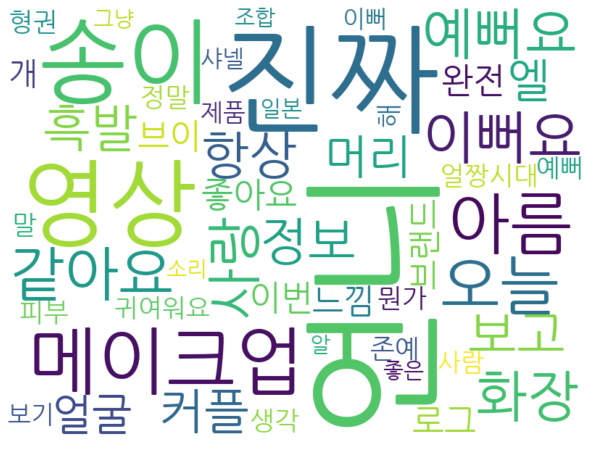

In [21]:
# 파일 합치는 곳 (폴더 제목 입력)
youtube_channel = input("유투브 채널 이름 입력하시오.")
path =  str(youtube_channel) + "/comment"
path2 = str(youtube_channel) + '/result.csv'
arg_youtube = str(youtube_channel) + "*"


allFile_list = glob.glob(os.path.join(path,arg_youtube))
print(allFile_list)
allData = []
for file in allFile_list:
    df = pd.read_csv(file)
    allData.append(df)
    
dataCombine = pd.concat(allData,axis =0, ignore_index = True)

dataCombine.to_csv(path2, index = False)
cdPath = str(youtube_channel) + '/result.csv'
comment_data = pd.read_csv(cdPath)
comment_data ##제대로 출력되는지 확인
com_list = list(comment_data['comment'])   ##제대로 출력되는지 확인
# com_list   ##제대로 출력되는지 확인

# ### 추출된 단어가 무슨 형태인지 파악
# # for sentence in com_list:
# #     morph = twitter.pos(sentence)
# #     sentences_tag.append(morph)

# 추출 단어들 저장

def get_noun(comment_txt):
    
    twitter = Twitter()
    noun_list = []
    
    if len(comment_txt) > 0:
        twitter = twitter.pos(comment_txt, norm = True, stem = True)
        for word, tag in twitter:
            if tag in ['Noun']:
                if word not in stop_words:
                    noun_list.append(word)
                    
    return noun_list

def get_adj(comment_txt):

    twitter = Twitter()
    adj_list = []
    
    if len(comment_txt) > 0:
        twitter = twitter.pos(comment_txt, norm = True, stem = True)
        for word, tag in twitter:
            if tag in ['Adjective']:
                if word not in stop_words:
                    adj_list.append(word)
                    
    return adj_list

def get_verb(comment_txt):

    twitter = Twitter()
    verb_list = []
    
    if len(comment_txt) > 0:
        twitter = twitter.pos(comment_txt, norm = True, stem = True)
        for word, tag in twitter:
            if tag in ['Verb']:
                if word not in stop_words:
                    verb_list.append(word)
    return verb_list

comment_list = []
for i in range(len(comment_data)):
    comment_list.append(comment_data['comment'].iloc[i])
    
comment_result = []

for i in comment_list:
    comment_result.append(i)
    
comment_result = pd.DataFrame(comment_result, columns=["comment"])
    
#cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
comment_result['noun'] = comment_result['comment'].apply(lambda x: get_noun(x))
comment_result['adj'] = comment_result['comment'].apply(lambda x: get_adj(x))
comment_result['verb'] = comment_result['comment'].apply(lambda x: get_verb(x))

comment_result.to_csv(youtube_channel +'/{}token_result.csv'.format(youtube_channel),
                                                                   index = False, encoding = 'utf-8-sig')


twitter = Twitter()

sentences_tag = []
for sentence in tqdm_notebook(com_list):
     morph = twitter.pos(sentence)
     sentences_tag.append(morph)

stop_words
for sentence in comment_data:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
#     print(morph)
#     print('-'*30)

# print(sentences_tag)
# print(len(sentences_tag))
# print('\n'*3)

noun_adj_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective','verb']:
            if word not in stop_words:
                noun_adj_list.append(word)            

counts = Counter(noun_adj_list)
select_data = counts.most_common(50)


wc = WordCloud(font_path='NanumGothic.ttf',max_font_size=200,background_color='white' ,width=800, height=600)
    
print(dict(select_data))
cloud = wc.generate_from_frequencies(dict(select_data))
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(cloud,interpolation='bilinear')
plt.show()
cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장